### Import Library

In [2]:
import pandas as pd
import os

### Merging 12 months files into a file

In [4]:
directory = 'Downloads/Sales_Data'
files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]
# print(files)
df = pd.concat(map(pd.read_csv, files), ignore_index = True)
df.to_csv('Downloads/all_Month_Data.csv', index=False)

### Read in updated data

In [6]:
all_data = pd.read_csv('Downloads/all_Month_Data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Argument data with additional columns

#### TASK 2: ADD MONTH COLUMNS

In [9]:
all_data.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

##### Clean nan values

In [11]:
all_Nan = all_data[all_data.isna().any(axis = 1)]
all_data = all_data.dropna(how = 'all')

In [12]:
all_data.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [13]:
all_data.loc[:, 'Month'] = all_data['Order Date'].str[:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Find and Delete 'Or'

In [15]:
# all_data['Month'].astype('int')
filt = (all_data['Month']=='Or')
all_data = all_data.drop(all_data[filt].index)

### ADD MONTH COLUMN

In [17]:
all_data['Month'] = all_data['Month'].astype(int)

#### Convert to appropriate data types

In [19]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [20]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')

#### Split the Date column to seperate Date and Time

In [22]:
all_data['Time'] = all_data['Order Date'].str.split(pat = ' ').str[1]
all_data['Order Date'] = all_data['Order Date'].str.split(pat = ' ').str[0]

In [23]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",4,08:46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",4,22:30,99.99
3,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",4,14:38,600.00
4,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",4,14:38,11.99
5,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",4,09:27,11.99


### What was the best month for salse? How much was earned that month?

In [26]:
result = all_data.select_dtypes(include=['int', 'float']).groupby(all_data['Month']).sum()

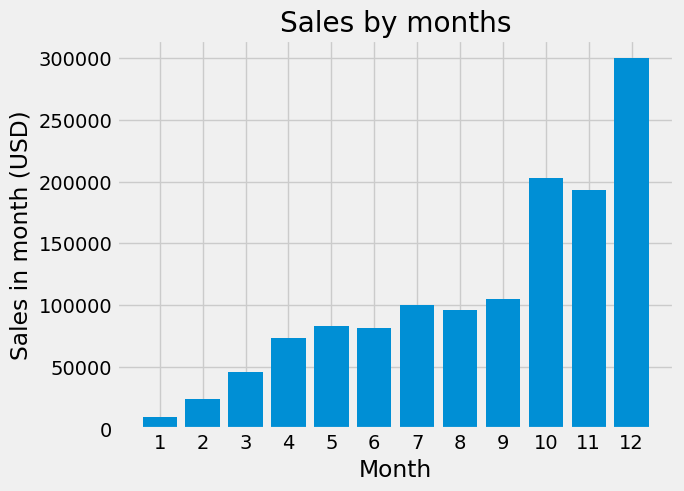

In [27]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
Month = range(1,13)
plt.bar(Month, result['Month'])
plt.xticks(Month)
plt.title('Sales by months')
plt.xlabel('Month')
plt.ylabel('Sales in month (USD)')
plt.show()

### Question 2: What city had the highest number of sales?

#### Add the City column

In [79]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1] +' ('+ all_data['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]+')'

In [85]:
numeric_cols = all_data.select_dtypes(include=['number'])
result1 = all_data.groupby('City')[numeric_cols.columns].sum()
result1

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


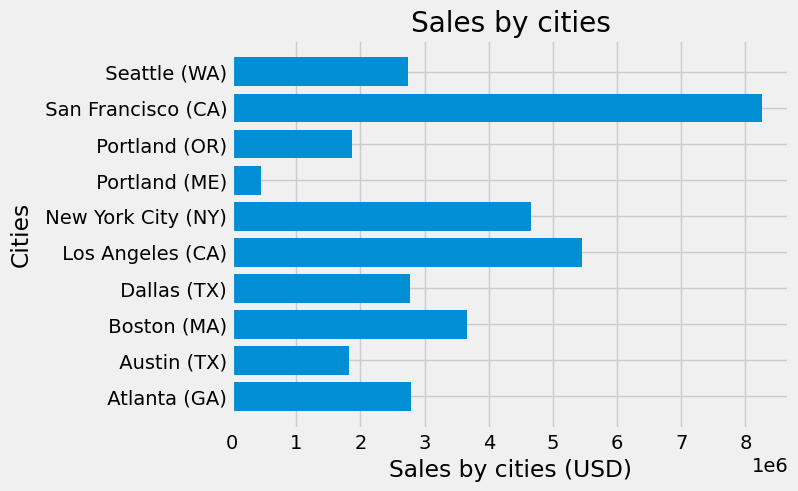

In [103]:
plt.style.use('fivethirtyeight')
cities = [city for city,df in all_data.groupby('City')]
plt.barh(cities, result1['Sales'])
plt.title('Sales by cities')
plt.xlabel('Sales by cities (USD)')
plt.ylabel('Cities')
plt.show()

In [99]:
result1['Sales'].max()

np.float64(8262203.91)

### Question 3: What time should  we display advertisements to maximize the likelihood of customer's buying products?

In [139]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['MInute'] = all_data['Order Date'].dt.minute

In [141]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Order Date,Sales,City,Hour,MInute
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,2024-09-29 08:46:00,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,2024-09-29 22:30:00,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",4,2024-09-29 14:38:00,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",4,2024-09-29 14:38:00,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",4,2024-09-29 09:27:00,11.99,Los Angeles (CA),9,27


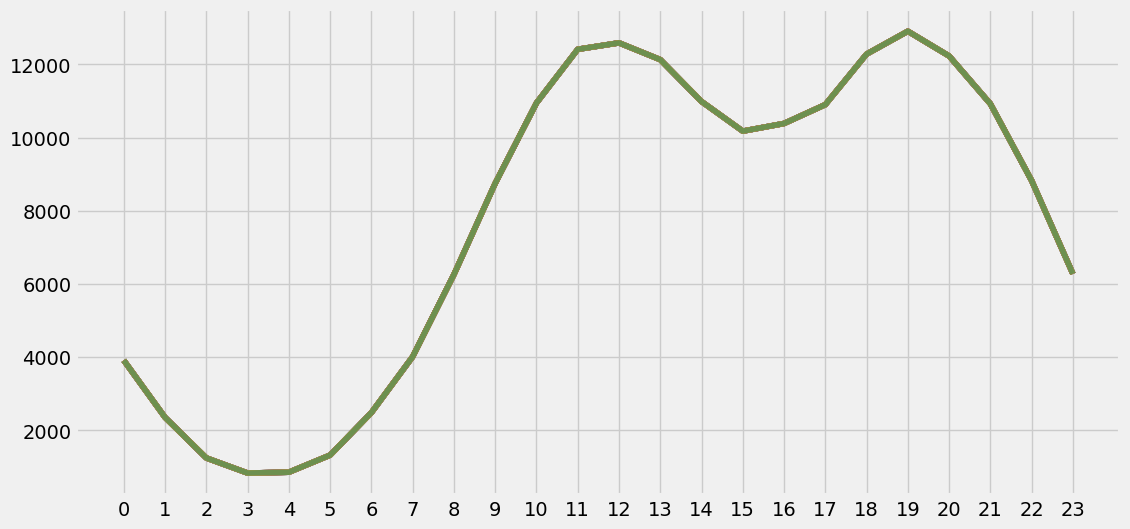

In [175]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(12, 6))
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.show()

### What products are most often sold together?

In [196]:
filt = (all_data['Order ID'].duplicated(keep = False))
df = all_data.loc[filt]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16540\465116023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [204]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product was sold the most? Why do you think it was sold the most?

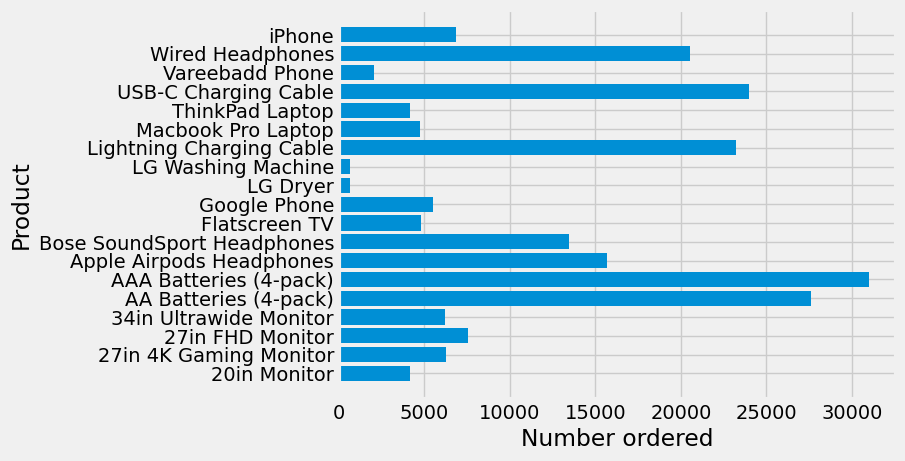

In [254]:
product_group = all_data.groupby('Product')
quatity_ordered = product_group['Quantity Ordered'].sum()
products = [product for product, df in product_group]
# plt.xticks(products, rotation = 'vertical', size = 8)
plt.barh(products, quatity_ordered)

plt.xlabel('Number ordered')
plt.ylabel('Product')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16540\1963452096.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16540\1963452096.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


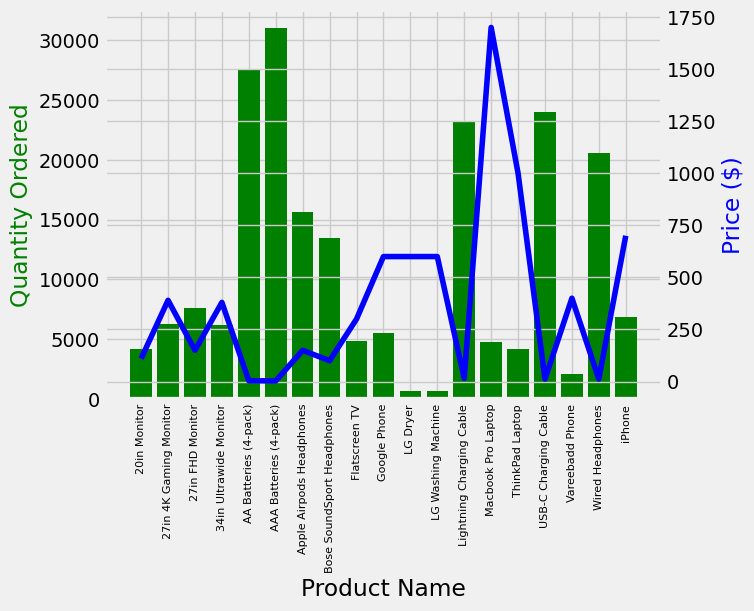

In [264]:

prices = all_data.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quatity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()